In [178]:
import torch
import json
import matplotlib.pyplot as plt

In [5]:
codenames_file = '../data/processed_data/codenames_vecs.json'
dictionary_file = '../data/processed_data/dictionary_vecs.json'

In [164]:
class Codenames:
    def __init__(self,
        codenames_file='../data/processed_data/codenames_vecs.json',
        dictionary_file='../data/processed_data/dictionary_vecs.json'
    ):
        self.codenames_words, self.codenames_vecs = self.load_data(codenames_file)
        self.dictionary_words, self.dictionary_vecs = self.load_data(dictionary_file)
        self.cosine_sim_mat = torch.matmul(self.dictionary_vecs, self.codenames_vecs.T) # shape = (NUM_DICT, NUM_CODENAMES)
        self.initiate_game()
        self.display_board()

    def load_data(self, file):
        with open(file) as f:
            content = json.load(f)
        words = np.array(list(content.keys()))
        vecs = torch.Tensor(list(content.values()))
        return words, vecs

    def initiate_game(self):
        game_words = np.random.choice(range(self.cosine_sim_mat.shape[1]), 25)
        self.team_a = game_words[:9]
        self.team_b = game_words[9:17]
        self.neutral = game_words[17:24]
        self.black = game_words[24:25]
        self.game_word_ids = np.random.choice(game_words, 25, replace=False)
        return None
    
    def display_board(self):
        print(self.codenames_words[self.game_word_ids])
        return None
    
    def compute_score(self):
        ret = (
            self.cosine_sim_mat[:, team_a].sum(axis=1) -
            2 * self.cosine_sim_mat[:, team_b].sum(axis=1) - 
            self.cosine_sim_mat[:, neutral].sum(axis=1) -
            5 * self.cosine_sim_mat[:, black].sum(axis=1)
        )
        return ret
    
    def ai_guess(self):
        score = self.compute_score()
        return self.dictionary_words[score.argmax()], score.argmax()

In [165]:
a = Codenames()

['canada' 'death' 'fence' 'honey' 'well' 'giant' 'shot' 'germany' 'belt'
 'car' 'fire' 'palm' 'pipe' 'root' 'mine' 'stream' 'theater' 'ball' 'life'
 'tablet' 'ruler' 'cell' 'thief' 'bond' 'mole']


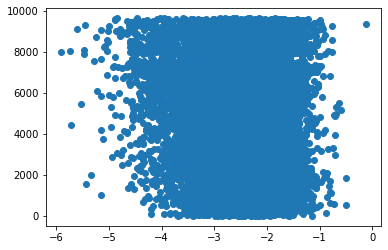

In [183]:
plt.scatter(a.compute_score(), range(9650))

In [60]:
def get_score(attempt):
    score = 0
    for word in team_a:
        score += kv.similarity(attempt, word)
    for word in team_b:
        score -= kv.similarity(attempt, word)
    return score

In [63]:
best_score = 0
best_word = None
for word in kv.index_to_key:
    score = get_score(word)
    if score > best_score:
        best_score = score
        best_word = word
        print(best_word, best_score)
print(word)

first 0.1200227439403534
years 0.23091446282342076
team 0.39515744149684906
home 0.4928790330886841
building 0.512497644405812
field 0.5791422910988331
hospital 0.6857124801026657
heart 0.8672120422124863
seal 1.115716615691781
damerel


In [65]:
print(team_a)

['boom' 'seal' 'hospital' 'flute' 'lap' 'press' 'pistol' 'bark' 'tag'
 'heart' 'field' 'horseshoe']
